In [1]:
import scipy as sps
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
palette = sns.color_palette("Paired")
size = 8
nsample = 30000

## The central Chi2 distribution 

Let $\{ Z_1,...,Z_k\}$ be $k$ independent normally distributed random variables with mean 0 and unit variance (standard normal). The statistic $$X=\sum_{i-1}^{k}Z_i$$ is distributed according to the chi2 distribution of $k$ degrees of freedom, given by $$\chi^2_k(x) = \frac{x^{k/2-1}\exp(-x/2)}{2^{k/2}\Gamma(k/2)}$$

It has mean at $E[X]=n$ and variance $\sigma^2[X]=2n$

In [5]:
def chi2_pdf(x, dof):
    core = np.power(x, dof/2-1) * np.exp(-x/2)
    factor = (1 / (2 ** (dof/2) * sps.special.gamma(dof/2)))
    return factor * core

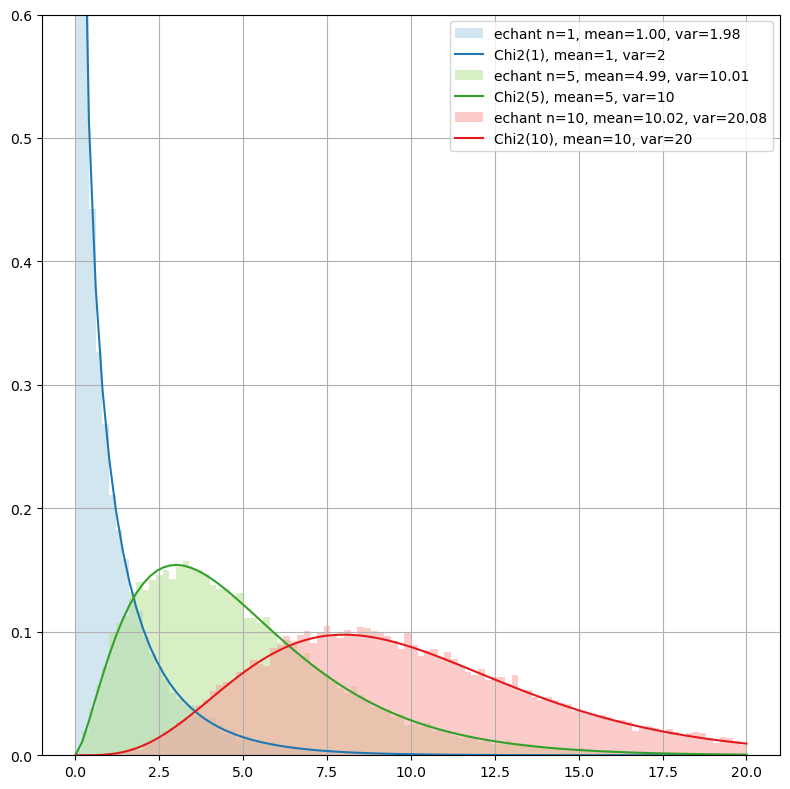

In [11]:
# plot chi2 probability distribution function for different degrees of freedom
# sample from a normal distribution and square the values to get a chi2 distribution
# compare the histogram of the sample with the pdf
# compute sample mean as an estimate of the mean of the distribution
# compute sample variance as an estimate of the variance of the distribution

fig, ax = plt.subplots(1,1, figsize=(size,size))

x = np.linspace(1e-6, 20, 100)

# degrees of freedom
dfs = [1, 5, 10]

for i in range(len(dfs)):
    df = dfs[i]
    pair = np.reshape(palette, (-1, 2, 3))[i]
    # echant = sps.stats.chi2.rvs(df, size=10000)

    echant = np.zeros(nsample)
    for j in range(df):
        sample = sps.stats.norm.rvs(size=nsample)
        sample_square = np.square(sample)
        echant = echant + sample_square

        sample_mean = np.mean(echant)
        sample_variance = np.var(echant, ddof=1)
    
    ax.hist(echant, bins=100, range=(0, 20), color=pair[0], density=True, alpha=0.5, label=f"echant n={df}, mean={sample_mean:.2f}, var={sample_variance:.2f}")
    ax.plot(x, chi2_pdf(x, dof=df), color = pair[1], label=f"Chi2({df}), mean={df}, var={2*df}")

ax.legend()
ax.set_ylim(0, .6)
ax.grid()
plt.tight_layout()
plt.show()

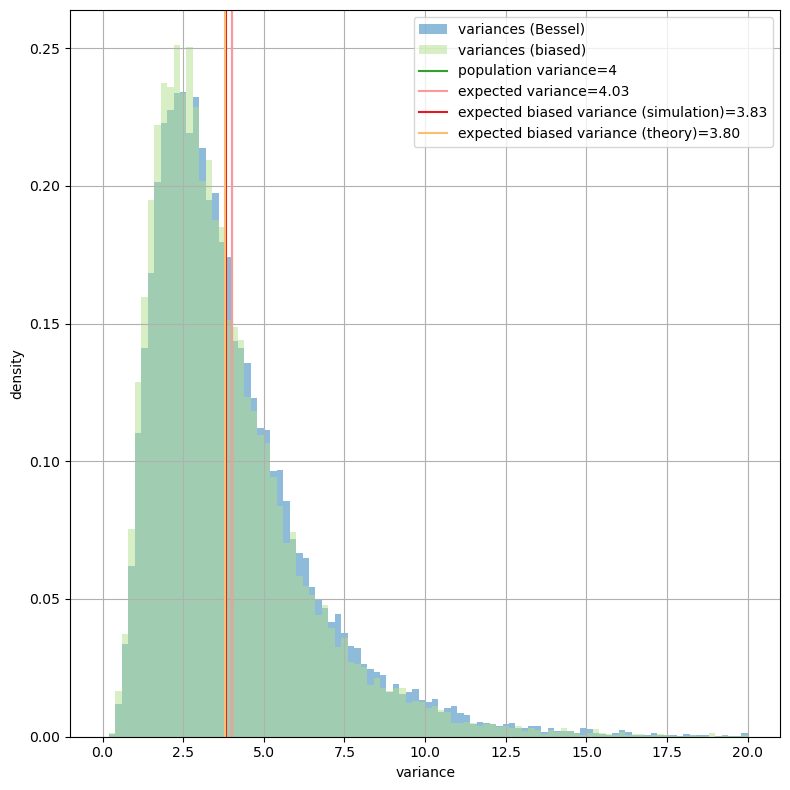

In [27]:
# Bessel correction for sample variance
# a unbiased estimator of the population variance is the sample variance with Bessel correction, i.e. sum((x_i - mean)^2) / (n-1) instead of sum((x_i - mean)^2) / n
# the expected value of the sample variance with Bessel correction is the population variance. We demonstrate this by simulating the sample variance of a chi2 
# 2 degrees of freedom

# the expected value of the sample variance without Bessel correction is the population variance multiplied by (n-1)/n

n_simulations = 20000
sample_size = 20
dof = 2

variances = []
biased_variances = []
for i in range(n_simulations):
    echant = np.zeros(sample_size)
    for j in range(dof):
        sample = sps.stats.norm.rvs(size=sample_size)
        sample_square = np.square(sample)
        echant = echant + sample_square
    
    sample_mean = np.mean(echant)
    sample_variance_bessel = np.var(echant, ddof=1)
    sample_variance_biased = np.var(echant, ddof=0)
    variances.append(sample_variance_bessel)
    biased_variances.append(sample_variance_biased)

expected_var = np.mean(variances)
expected_biased_var = np.mean(biased_variances)

# the population variance is 2 * dof
population_variance = 2 * dof
# the expected value of the sample variance without Bessel correction is the population variance multiplied by (n-1)/n
expected_biased_var_theory = population_variance * (sample_size - 1) / sample_size

fig, ax = plt.subplots(1,1, figsize=(size,size))
ax.hist(variances, bins=100, range=(0,20),  color=palette[1], density=True, alpha=0.5, label="variances (Bessel)")
ax.hist(biased_variances, bins=100, range=(0,20),  color=palette[2], density=True, alpha=0.5, label="variances (biased)")
ax.axvline(population_variance, color=palette[3], label=f"population variance={population_variance}")
ax.axvline(expected_var, color=palette[4], label=f"expected variance={expected_var:.2f}")
ax.axvline(expected_biased_var, color=palette[5], label=f"expected biased variance (simulation)={expected_biased_var:.2f}")
ax.axvline(expected_biased_var_theory, color=palette[6], label=f"expected biased variance (theory)={expected_biased_var_theory:.2f}")

ax.grid()
ax.legend()
ax.set_xlabel("variance")
ax.set_ylabel("density")
plt.tight_layout()
plt.show()

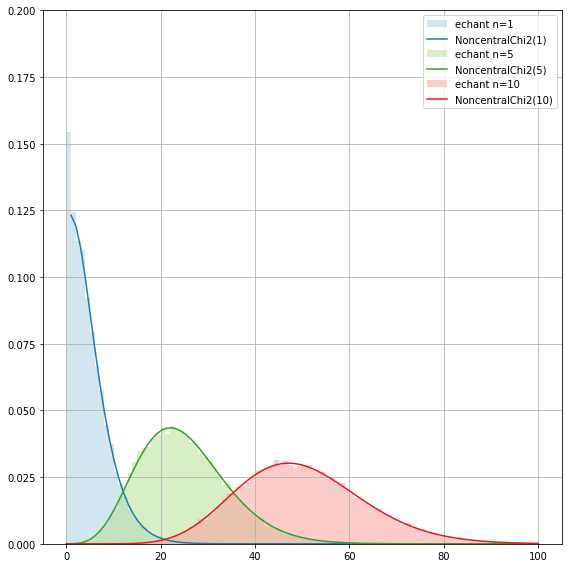

In [ ]:
# noncentral chi2 distribution

mu = 2

fig, ax = plt.subplots(1,1, figsize=(size,size))
xmax = 100

x = np.linspace(0,xmax, 100)

dfs = [1, 5, 10]

for i in range(len(dfs)):
    df = dfs[i]
    pair = np.reshape(palette, (-1, 2, 3))[i]
    # echant = sps.stats.chi2.rvs(df, size=10000)
    nc = np.sum([mu**2] * df)

    echant = np.zeros(nsample)
    for j in range(df):
        sample = sps.stats.norm.rvs(loc=mu, size=nsample)
        sample_square = np.square(sample)
        echant = echant + sample_square
    
    ax.hist(echant, bins=100, range=(0, xmax), color=pair[0], density=True, alpha=0.5, label=f"echant n={df}")
    ax.plot(x, sps.stats.ncx2.pdf(x, df=df, nc=nc), color = pair[1], label=f"NoncentralChi2({df})")


ax.legend()
ax.set_ylim(0, .2)
ax.grid()
plt.tight_layout()
plt.show()
